In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import ipdb

In [50]:
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')


## Seasons

In [51]:
#load in all my season data
season09=pd.read_csv('data/season-0910.csv')
season10=pd.read_csv('data/season-1011.csv')
season11=pd.read_csv('data/season-1112.csv')
season12=pd.read_csv('data/season-1213.csv')
season13=pd.read_csv('data/season-1314.csv')
season14=pd.read_csv('data/season-1415.csv')
season15=pd.read_csv('data/season-1516.csv')
season16=pd.read_csv('data/season-1617.csv')
season17=pd.read_csv('data/season-1718.csv')

In [52]:
season09

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,15/08/09,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,14,5,7,15,14,4,6,2,2,0,0
1,15/08/09,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,8,9,5,12,9,5,4,2,1,0,0
2,15/08/09,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,20,3,13,16,10,4,7,2,1,0,0
3,15/08/09,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,7,12,3,13,15,12,4,1,2,0,0
4,15/08/09,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,09/05/10,Everton,Portsmouth,1,0,H,0,0,D,P Walton,21,10,13,4,12,11,14,1,0,0,0,0
376,09/05/10,Hull,Liverpool,0,0,D,0,0,D,A Marriner,11,19,6,7,15,11,2,6,1,0,0,0
377,09/05/10,Man United,Stoke,4,0,H,2,0,H,M Clattenburg,18,4,13,4,10,4,10,2,2,0,0,0
378,09/05/10,West Ham,Man City,1,1,D,1,1,D,H Webb,12,17,8,6,12,7,4,3,2,0,0,0


In [53]:
seasons=[season09,season10,season11,season12,season13,season14,season15,season16,season17]

In [54]:
same=[]
diff=[]
for table in range(1,len(tables)):
    if (tables[0].columns==tables[table].columns).all:
        same.append(table)
    else:
        diff.append(table)
if len(diff)>0:
    print(f"Table {table} has different columns")
else:
    print("All tables have the same columns")
        
        


All tables have the same columns


| Name       | Type    | Format      | Description                                      |
|------------|---------|-------------|--------------------------------------------------|
| Date       | date    | `%d/%m/%y`  | Match Date (dd/mm/yy)                           |
| HomeTeam   | string  | default     | Home Team                                       |
| AwayTeam   | string  | default     | Away Team                                       |
| FTHG       | integer | default     | Full Time Home Team Goals                      |
| FTAG       | integer | default     | Full Time Away Team Goals                      |
| FTR        | string  | default     | Full Time Result (H=Home Win, D=Draw, A=Away Win) |
| HTHG       | integer | default     | Half Time Home Team Goals                      |
| HTAG       | integer | default     | Half Time Away Team Goals                      |
| HTR        | string  | default     | Half Time Result (H=Home Win, D=Draw, A=Away Win) |
| Referee    | string  | default     | Match Referee                                   |
| HS         | integer | default     | Home Team Shots                                 |
| AS         | integer | default     | Away Team Shots                                 |
| HST        | integer | default     | Home Team Shots on Target                      |
| AST        | integer | default     | Away Team Shots on Target                      |
| HF         | integer | default     | Home Team Fouls Committed                      |
| AF         | integer | default     | Away Team Fouls Committed                      |
| HC         | integer | default     | Home Team Corners                              |
| AC         | integer | default     | Away Team Corners                              |
| HY         | integer | default     | Home Team Yellow Cards                         |
| AY         | integer | default     | Away Team Yellow Cards                         |
| HR         | integer | default     | Home Team Red Cards                            |
| AR         | integer | default     | Away Team Red Cards                            |


In [55]:
season09.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.697368,1.073684,0.744737,0.471053,13.728947,10.718421,7.723684,5.928947,11.639474,12.555263,6.215789,4.976316,1.384211,1.871053,0.060526,0.118421
std,1.467500,1.122964,0.825452,0.694269,5.379793,4.510577,3.622703,3.149352,3.576384,3.884153,3.111094,2.762731,1.168976,1.322309,0.249580,0.347137
min,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,5.000000,3.750000,9.000000,10.000000,4.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,0.000000,12.500000,10.000000,7.000000,5.000000,12.000000,12.000000,6.000000,5.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,10.000000,8.000000,14.000000,15.000000,8.000000,7.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,6.000000,4.000000,5.000000,33.000000,27.000000,19.000000,17.000000,23.000000,24.000000,16.000000,14.000000,5.000000,6.000000,2.000000,2.000000


In [56]:
seasons[0]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,15/08/09,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,14,5,7,15,14,4,6,2,2,0,0
1,15/08/09,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,8,9,5,12,9,5,4,2,1,0,0
2,15/08/09,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,20,3,13,16,10,4,7,2,1,0,0
3,15/08/09,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,7,12,3,13,15,12,4,1,2,0,0
4,15/08/09,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,09/05/10,Everton,Portsmouth,1,0,H,0,0,D,P Walton,21,10,13,4,12,11,14,1,0,0,0,0
376,09/05/10,Hull,Liverpool,0,0,D,0,0,D,A Marriner,11,19,6,7,15,11,2,6,1,0,0,0
377,09/05/10,Man United,Stoke,4,0,H,2,0,H,M Clattenburg,18,4,13,4,10,4,10,2,2,0,0,0
378,09/05/10,West Ham,Man City,1,1,D,1,1,D,H Webb,12,17,8,6,12,7,4,3,2,0,0,0


In [57]:
allSeasons=pd.concat(seasons,axis=0, ignore_index=True)

In [58]:
len(allSeasons) / 9

380.0

In [59]:
allSeasons.info()
#no null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3420 non-null   object
 1   HomeTeam  3420 non-null   object
 2   AwayTeam  3420 non-null   object
 3   FTHG      3420 non-null   int64 
 4   FTAG      3420 non-null   int64 
 5   FTR       3420 non-null   object
 6   HTHG      3420 non-null   int64 
 7   HTAG      3420 non-null   int64 
 8   HTR       3420 non-null   object
 9   Referee   3420 non-null   object
 10  HS        3420 non-null   int64 
 11  AS        3420 non-null   int64 
 12  HST       3420 non-null   int64 
 13  AST       3420 non-null   int64 
 14  HF        3420 non-null   int64 
 15  AF        3420 non-null   int64 
 16  HC        3420 non-null   int64 
 17  AC        3420 non-null   int64 
 18  HY        3420 non-null   int64 
 19  AY        3420 non-null   int64 
 20  HR        3420 non-null   int64 
 21  AR        3420

In [60]:
allSeasons.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,3420.000000,3420.000000,3420.000000,3420.000000,3420.00000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000
mean,1.570760,1.171930,0.692982,0.516667,14.18655,11.238596,6.151462,4.856725,10.670468,11.225439,6.064035,4.798830,1.473099,1.780994,0.060819,0.088304
std,1.323608,1.158524,0.836368,0.731614,5.47597,4.691267,3.491834,2.937379,3.405242,3.578035,3.147304,2.737924,1.195992,1.292425,0.247450,0.296875
min,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.00000,8.000000,4.000000,3.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,14.00000,11.000000,6.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.00000,14.000000,8.000000,6.000000,13.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,7.000000,5.000000,5.000000,43.00000,30.000000,24.000000,20.000000,24.000000,26.000000,19.000000,19.000000,7.000000,9.000000,2.000000,2.000000


In [61]:
allSeasons['Date']=pd.to_datetime(allSeasons['Date'], format='%d/%m/%y')

In [62]:
allSeasons

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,14,5,7,15,14,4,6,2,2,0,0
1,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,8,9,5,12,9,5,4,2,1,0,0
2,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,20,3,13,16,10,4,7,2,1,0,0
3,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,7,12,3,13,15,12,4,1,2,0,0
4,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,2018-05-13,Newcastle,Chelsea,3,0,H,1,0,H,M Atkinson,16,6,6,2,11,10,4,2,0,1,0,0
3416,2018-05-13,Southampton,Man City,0,1,A,0,0,D,A Marriner,8,13,3,2,8,10,1,12,3,1,0,0
3417,2018-05-13,Swansea,Stoke,1,2,A,1,2,A,A Taylor,26,8,11,5,12,9,6,0,1,2,0,0
3418,2018-05-13,Tottenham,Leicester,5,4,H,1,2,A,C Pawson,14,16,6,9,9,13,4,4,1,2,0,0


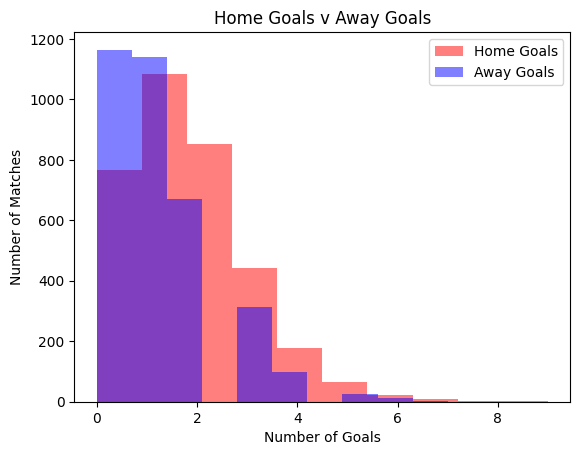

In [63]:
#full time home-team goals and full time away-team goals
plt.hist(allSeasons['FTHG'], alpha=0.5, label='Home Goals', color='red')
plt.hist(allSeasons['FTAG'], alpha=0.5, label='Away Goals', color='blue')
plt.xlabel('Number of Goals')
plt.ylabel('Number of Matches')
plt.title('Home Goals v Away Goals')
plt.legend()
plt.show()

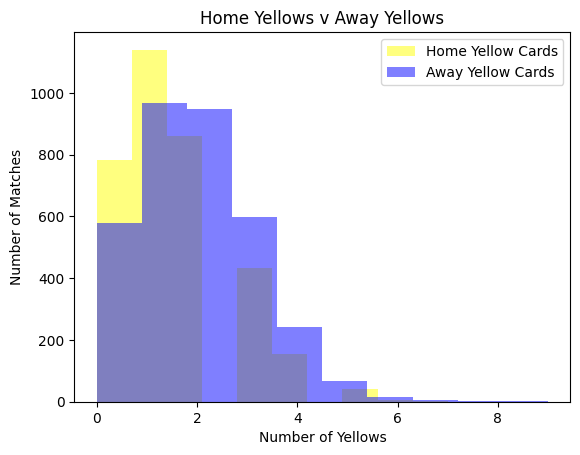

In [64]:

plt.hist(allSeasons['HY'], alpha=0.5, label='Home Yellow Cards', color='yellow')
plt.hist(allSeasons['AY'], alpha=0.5, label='Away Yellow Cards', color='blue')
plt.xlabel('Number of Yellows')
plt.ylabel('Number of Matches')
plt.title('Home Yellows v Away Yellows')
plt.legend()
plt.show()

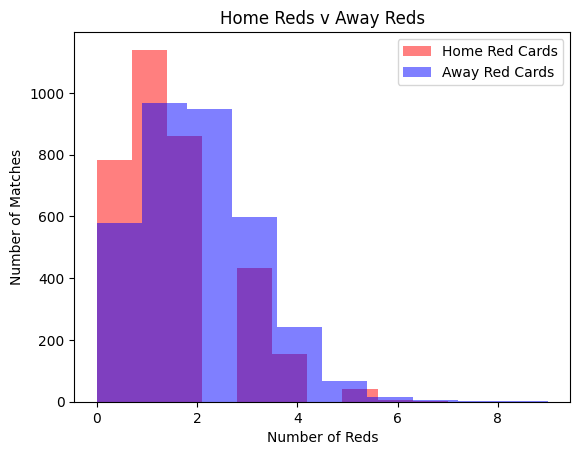

In [65]:
plt.hist(allSeasons['HY'], alpha=0.5, label='Home Red Cards', color='red')
plt.hist(allSeasons['AY'], alpha=0.5, label='Away Red Cards', color='blue')
plt.xlabel('Number of Reds')
plt.ylabel('Number of Matches')
plt.title('Home Reds v Away Reds')
plt.legend()
plt.show()

Can see that there are more home goals and more away cards give. Unsurprising.

## Bookies

In [66]:
bookies09=pd.read_csv('data/bookies09.csv')
bookies10=pd.read_csv('data/bookies10.csv')
bookies11=pd.read_csv('data/bookies11.csv')
bookies12=pd.read_csv('data/bookies12.csv')
bookies13=pd.read_csv('data/bookies13.csv')
bookies14=pd.read_csv('data/bookies14.csv')
bookies15=pd.read_csv('data/bookies15.csv')
bookies16=pd.read_csv('data/bookies16.csv')
bookies17=pd.read_csv('data/bookies17.csv')

In [67]:
bookies14.drop(index=380, inplace=True)

In [68]:
bookies09['Date'].head()

0    15/08/09
1    15/08/09
2    15/08/09
3    15/08/09
4    15/08/09
Name: Date, dtype: object

In [69]:
bookies10['Date'].head()

0    14/08/10
1    14/08/10
2    14/08/10
3    14/08/10
4    14/08/10
Name: Date, dtype: object

In [70]:
bookies11['Date'].head()

0    13/08/11
1    13/08/11
2    13/08/11
3    13/08/11
4    13/08/11
Name: Date, dtype: object

In [71]:
bookies12['Date'].head()

0    18/08/12
1    18/08/12
2    18/08/12
3    18/08/12
4    18/08/12
Name: Date, dtype: object

In [72]:
bookies13['Date'].head()

0    17/08/13
1    17/08/13
2    17/08/13
3    17/08/13
4    17/08/13
Name: Date, dtype: object

In [73]:
bookies14['Date'].head()

0    16/08/14
1    16/08/14
2    16/08/14
3    16/08/14
4    16/08/14
Name: Date, dtype: object

In [74]:
pd.to_datetime(bookies15['Date'], format='%d/%m/%Y')

0     2015-08-08
1     2015-08-08
2     2015-08-08
3     2015-08-08
4     2015-08-08
         ...    
375   2016-05-15
376   2016-05-15
377   2016-05-15
378   2016-05-15
379   2016-05-17
Name: Date, Length: 380, dtype: datetime64[ns]

In [75]:
bookies16['Date'].head()

0    13/08/16
1    13/08/16
2    13/08/16
3    13/08/16
4    13/08/16
Name: Date, dtype: object

In [76]:
bookies17['Date'].head()

0    11/08/2017
1    12/08/2017
2    12/08/2017
3    12/08/2017
4    12/08/2017
Name: Date, dtype: object

The 2015 and 2017 season have different date formats. I will set them to datetimes separately.

In [77]:
bookies=[bookies09,bookies10,bookies11,bookies12,bookies13,bookies14,bookies15,bookies16,bookies17]

In [32]:
#seasons=[season09,season10,season11,season12,season13,season14,season15,season16,season17]

In [78]:
# Loop through each pair of DataFrames
for i in range(len(seasons)):
    if tables[i].equals(bookies[i][allSeasons.columns]):
        print(f"Pair {i+1} (season {i+9}) matches.")
    else:
        print(f"Pair {i+1} (season {i+9}) does not match.")

Pair 1 (season 9) matches.
Pair 2 (season 10) matches.
Pair 3 (season 11) matches.
Pair 4 (season 12) matches.
Pair 5 (season 13) matches.
Pair 6 (season 14) does not match.
Pair 7 (season 15) does not match.
Pair 8 (season 16) matches.
Pair 9 (season 17) does not match.


I looked at the data sets and, apart from the bookmaker odds, they mostly just contain the same data as my season data.

And it lines up nicely. The year 14, 15 and 17 dont line for data type reasons. In the bookies data a lot of the columns turn into floats. And there is an extra null row in bookies14.

So for this reason I will use my season tables data and just append the book maker odds from these tables.

I will append the bet365 odds because I am most familiar with that website in real life.

I also might use these values as features:
- Bb1X2 = Number of BetBrain bookmakers used to calculate match odds averages and maximums
- BbMxH = Betbrain maximum home win odds
- BbAvH = Betbrain average home win odds
- BbMxD = Betbrain maximum draw odds
- BbAvD = Betbrain average draw win odds
- BbMxA = Betbrain maximum away win odds
- BbAvA = Betbrain average away win odds


In [79]:
bettingColumns=['B365H','B365D','B365A','Bb1X2','BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA']

In [80]:
for i, table in enumerate(bookies):
    if set(bettingColumns).issubset(table.columns):
        print(f"Bookies table {i+1} contains all the required columns.")
    else:
        print(f"Bookies table {i+1} is missing some required columns.")

Bookies table 1 contains all the required columns.
Bookies table 2 contains all the required columns.
Bookies table 3 contains all the required columns.
Bookies table 4 contains all the required columns.
Bookies table 5 contains all the required columns.
Bookies table 6 contains all the required columns.
Bookies table 7 contains all the required columns.
Bookies table 8 contains all the required columns.
Bookies table 9 contains all the required columns.


In [81]:
bookies09[['Date', 'HomeTeam', 'AwayTeam'] + bettingColumns]


,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA
0,15/08/09,Aston Villa,Wigan,1.67,3.60,5.50,37,1.72,1.66,3.77,3.51,6.05,5.33
1,15/08/09,Blackburn,Man City,3.60,3.25,2.10,38,3.78,3.37,3.35,3.24,2.25,2.12
2,15/08/09,Bolton,Sunderland,2.25,3.25,3.25,38,2.37,2.24,3.31,3.20,3.40,3.15
3,15/08/09,Chelsea,Hull,1.17,6.50,21.00,38,1.20,1.17,7.71,6.26,23.14,16.39
4,15/08/09,Everton,Arsenal,3.20,3.25,2.30,38,3.34,3.07,3.34,3.21,2.42,2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,09/05/10,Everton,Portsmouth,1.29,5.50,11.00,36,1.30,1.28,6.00,5.23,12.44,10.38
376,09/05/10,Hull,Liverpool,6.50,3.80,1.57,37,7.26,6.22,4.35,3.91,1.59,1.54
377,09/05/10,Man United,Stoke,1.13,8.00,23.00,37,1.15,1.12,9.60,7.98,26.50,20.73
378,09/05/10,West Ham,Man City,4.00,3.60,1.91,36,4.35,4.10,3.75,3.51,1.96,1.85


In [82]:
#casting all date fields to correct date format

for i, table in enumerate(bookies):
    dates=table['Date'].apply(lambda x: len(x)).unique()
    if len(dates)==1:
        if dates[0]==8:
            table['Date']=pd.to_datetime(table['Date'], format='%d/%m/%y')
            
        elif dates[0]==10:
            table['Date']=pd.to_datetime(table['Date'], format='%d/%m/%Y')
        else:
            print(f"unexpected date format, check table {i}")
    else:
         print(f"more than 1 date format, check table {i}")

In [83]:
bookieCols=['Date', 'HomeTeam', 'AwayTeam'] + bettingColumns

In [84]:
#combined_tables=[]

#for table in bookies:
#    combined_tables.append(table[bookieCols])
    

In [85]:
allBookies=pd.concat(bookies, axis=0, ignore_index=True)

Sanity check to see if my date and team names match before doing join

In [86]:
allBookies[['Date','HomeTeam','AwayTeam']].sort_values(by=['Date','HomeTeam']).equals(
    allSeasons[['Date','HomeTeam','AwayTeam']].sort_values(by=['Date','HomeTeam']))

True

In [87]:
allSeasons=allSeasons.merge(allBookies[['Date', 'HomeTeam', 'AwayTeam'] + bettingColumns], on=['Date','HomeTeam','AwayTeam'])

In [88]:
allSeasons

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA
0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,14,5,7,15,14,4,6,2,2,0,0,1.67,3.60,5.50,37.0,1.72,1.66,3.77,3.51,6.05,5.33
1,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,8,9,5,12,9,5,4,2,1,0,0,3.60,3.25,2.10,38.0,3.78,3.37,3.35,3.24,2.25,2.12
2,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,20,3,13,16,10,4,7,2,1,0,0,2.25,3.25,3.25,38.0,2.37,2.24,3.31,3.20,3.40,3.15
3,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,7,12,3,13,15,12,4,1,2,0,0,1.17,6.50,21.00,38.0,1.20,1.17,7.71,6.26,23.14,16.39
4,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,3.20,3.25,2.30,38.0,3.34,3.07,3.34,3.21,2.42,2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,2018-05-13,Newcastle,Chelsea,3,0,H,1,0,H,M Atkinson,16,6,6,2,11,10,4,2,0,1,0,0,6.50,4.20,1.60,41.0,6.60,5.83,4.40,4.05,1.70,1.59
3416,2018-05-13,Southampton,Man City,0,1,A,0,0,D,A Marriner,8,13,3,2,8,10,1,12,3,1,0,0,9.00,5.00,1.39,41.0,9.00,7.39,5.15,4.82,1.46,1.42
3417,2018-05-13,Swansea,Stoke,1,2,A,1,2,A,A Taylor,26,8,11,5,12,9,6,0,1,2,0,0,1.90,3.79,4.20,41.0,1.98,1.89,3.90,3.67,4.35,4.08
3418,2018-05-13,Tottenham,Leicester,5,4,H,1,2,A,C Pawson,14,16,6,9,9,13,4,4,1,2,0,0,1.33,6.00,9.00,41.0,1.35,1.31,6.25,5.74,10.50,9.13


saving down processed data using pickle to perserve column types

In [89]:
allSeasons.to_pickle('data/allSeasons.pkl')

In [90]:
allSeasons=pd.read_pickle('data/allSeasons.pkl')

In [91]:
#load in all my season data
season09
season10
season11
season12
season13
season14
season15
season16
season17

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,M Dean,27,6,10,3,9,12,9,4,0,1,0,0
1,12/08/17,Brighton,Man City,0,2,A,0,0,D,M Oliver,6,14,2,4,6,9,3,10,0,2,0,0
2,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,C Pawson,19,10,6,5,16,11,8,5,3,3,2,0
3,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,J Moss,14,8,4,6,7,19,12,9,1,3,0,0
4,12/08/17,Everton,Stoke,1,0,H,1,0,H,N Swarbrick,9,9,4,1,13,10,6,7,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,13/05/18,Newcastle,Chelsea,3,0,H,1,0,H,M Atkinson,16,6,6,2,11,10,4,2,0,1,0,0
376,13/05/18,Southampton,Man City,0,1,A,0,0,D,A Marriner,8,13,3,2,8,10,1,12,3,1,0,0
377,13/05/18,Swansea,Stoke,1,2,A,1,2,A,A Taylor,26,8,11,5,12,9,6,0,1,2,0,0
378,13/05/18,Tottenham,Leicester,5,4,H,1,2,A,C Pawson,14,16,6,9,9,13,4,4,1,2,0,0


In [92]:
season09

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,15/08/09,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,14,5,7,15,14,4,6,2,2,0,0
1,15/08/09,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,8,9,5,12,9,5,4,2,1,0,0
2,15/08/09,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,20,3,13,16,10,4,7,2,1,0,0
3,15/08/09,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,7,12,3,13,15,12,4,1,2,0,0
4,15/08/09,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,09/05/10,Everton,Portsmouth,1,0,H,0,0,D,P Walton,21,10,13,4,12,11,14,1,0,0,0,0
376,09/05/10,Hull,Liverpool,0,0,D,0,0,D,A Marriner,11,19,6,7,15,11,2,6,1,0,0,0
377,09/05/10,Man United,Stoke,4,0,H,2,0,H,M Clattenburg,18,4,13,4,10,4,10,2,2,0,0,0
378,09/05/10,West Ham,Man City,1,1,D,1,1,D,H Webb,12,17,8,6,12,7,4,3,2,0,0,0
